<a href="https://colab.research.google.com/github/quachtumy/SIC-2025/blob/main/Multiavarible_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Viết câu lệnh đọc file Adv.cs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('/content/drive/MyDrive/DS 321 - Machine Learning 1/resources/Adv.csv', header=None)
df

,0,1,2,3
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
95,163.3,31.6,52.9,16.9
96,197.6,3.5,5.9,11.7
97,184.9,21.0,22.0,15.5
98,289.7,42.3,51.2,25.4


2. Tách dữ liệu thành hai tập X và y. Trong đó y là cột cuối, X gồm các cột còn lại

In [117]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X[:5], y[:5]

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3],
        [151.5,  41.3,  58.5],
        [180.8,  10.8,  58.4]]),
 array([22.1, 10.4,  9.3, 18.5, 12.9]))

3. Nối cột số 1 vào đầu tập X.

In [118]:
X = np.hstack([np.ones([X.shape[0],1]), X])
X[:5]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

4. Đưa dữ liệu về 0 đến 1 bằng cách chia cho giá trị lớn nhất tại mỗi cột

In [119]:
X = X/np.max(X, axis=0)
y = y/max(y)
X[:5], y[:5]

(array([[1.        , 0.18942949, 0.76209677, 0.60701754],
        [1.        , 0.03663456, 0.79233871, 0.39561404],
        [1.        , 0.01415987, 0.92540323, 0.60789474],
        [1.        , 0.12472215, 0.83266129, 0.51315789],
        [1.        , 0.14884334, 0.21774194, 0.5122807 ]]),
 array([0.87007874, 0.40944882, 0.36614173, 0.72834646, 0.50787402]))

5. Viết hàm dự đoán

In [120]:
def predict(X, m):
  return np.dot(X, m)

6. Viết hàm mất mát

In [121]:
def loss_function(X, y, m):
  n = len(y)
  y_pred = predict(X, m)
  total_error = 0.0
  for i in range(n):
    total_error += (y[i]-y_pred[i])**2
  return total_error/n

6.1. Viết hàm cập nhật tham số

In [122]:
def update_weights(X, y, m, learning_rate):
  n = len(y)
  m_deriv = 0.0
  y_pred = predict(X, m)
  for i in range(n):
    m_deriv += -2*X[i].reshape(-1,1)*(y[i]-y_pred[i])
  m -= learning_rate*m_deriv/n
  return m

In [123]:
X.shape, y.shape

((100, 4), (100,))

7. Viết hàm train

In [124]:
def train(X, y, m, learning_rate, iters):
  loss_history = []
  for i in range(iters):
    m = update_weights(X, y, m, learning_rate)
    loss = loss_function(X, y, m, learning_rate)
    loss_history.append(loss)
    if i % 10 == 0:
      print(f'iter={i}, m={m}, loss={loss}')
  return m, loss_history

8. Sử dụng hàm train đẻ train bộ dữ liệu trên

In [171]:
learning_rate = 0.1
iters = 3000
m = np.zeros([X.shape[1],1])
m, loss = train(X, y, m, learning_rate, iters)

iter=0, m=[[0.11388189]
 [0.01788501]
 [0.06392467]
 [0.03404619]], loss=[0.20488192]
iter=10, m=[[0.39467655]
 [0.07730012]
 [0.23924507]
 [0.11170765]], loss=[0.02764689]
iter=20, m=[[0.39785118]
 [0.09745661]
 [0.26251358]
 [0.10432673]], loss=[0.02654439]
iter=30, m=[[0.3907886 ]
 [0.11546156]
 [0.27813568]
 [0.09385516]], loss=[0.0258184]
iter=40, m=[[0.38405235]
 [0.13279995]
 [0.29205425]
 [0.08358521]], loss=[0.02517486]
iter=50, m=[[0.37797281]
 [0.14953806]
 [0.3046646 ]
 [0.07366414]], loss=[0.02460173]
iter=60, m=[[0.37248411]
 [0.16568762]
 [0.31612088]
 [0.06410831]], loss=[0.02408949]
iter=70, m=[[0.36751501]
 [0.18125987]
 [0.32655039]
 [0.05492436]], loss=[0.02363028]
iter=80, m=[[0.36300307]
 [0.19626737]
 [0.33606437]
 [0.04611477]], loss=[0.02321755]
iter=90, m=[[0.35889403]
 [0.21072371]
 [0.34476041]
 [0.03767881]], loss=[0.02284576]
iter=100, m=[[0.35514071]
 [0.22464334]
 [0.35272425]
 [0.02961312]], loss=[0.02251021]
iter=110, m=[[0.35170206]
 [0.23804124]
 [0.

9. Vẽ biểu độ biểu thị sự giảm giá trị của hàm mất mát trong quá trình train

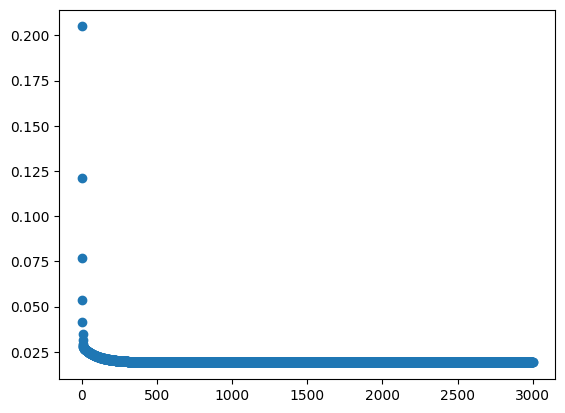

In [172]:
plt.scatter(range(len(loss)), loss);

10. Lọc ra 10 dòng dữ liệu đầu tiên. Sử dụng tham số đã train để tìm kết quả, so sanh kết qua với y thực

In [173]:
y_pred = predict(X, m)
res = pd.DataFrame(np.hstack([y.reshape(-1,1), y_pred]))
res.columns = ['y', 'y_pred']
res.head(10)

,y,y_pred
0,0.870079,0.685298
1,0.409449,0.634327
2,0.366142,0.660346
3,0.728346,0.690709
4,0.507874,0.421968
5,0.283465,0.678895
6,0.464567,0.600125
7,0.519685,0.518225
8,0.188976,0.313494
9,0.417323,0.858483
